In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df = pd.read_csv(r"C:\Users\yasin\Desktop\otel-restoran-tahmini\csv\birlesik_yorumlar.csv", header=None, names=["yorumlar"])

In [8]:
df


,yorumlar
0,0
1,"“The fries were terrific also, hot crisp...”"
2,“I love the food and our server Maria!”
3,“The filet mignon was impeccable and the musse...
4,“My seafood cocktail had wonderful large lump ...
...,...
17394,"The room was good, comfortable and aesthetic \..."
17395,good hotel
17396,good experience for me about hotel \nvery good...
17397,well done


In [9]:


def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (Ham Veri)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")


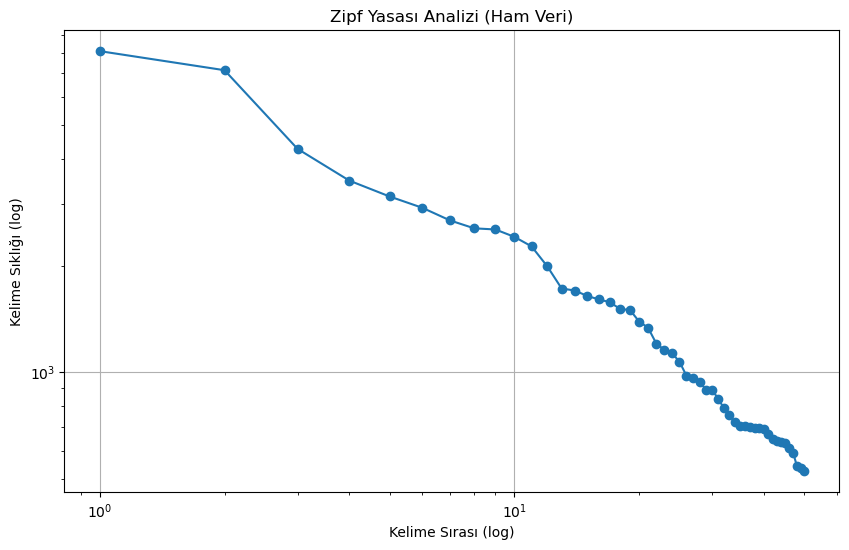

Toplam kelime sayısı: 159847
Farklı kelime sayısı: 7937
Veri seti yeterli büyüklükte.


In [10]:
df = pd.read_csv(r"C:\Users\yasin\Desktop\otel-restoran-tahmini\csv\birlesik_yorumlar.csv", header=None, names=["yorumlar"])
zipf_analysis(df["yorumlar"])
